In [7]:
import sys
sys.path.append('..') # Add parent directory to path

import pandas as pd
import glob
import os
import pylab
import matplotlib.pyplot as plt

In [8]:
price_files = glob.glob(
    os.path.join('ds', "*_prices.csv")
)

price_data = pd.DataFrame()
for ind, file in enumerate(price_files):
    df = pd.read_csv(file)
    df["resort"] = os.path.basename(file).split("_")[0]
    price_data = pd.concat([price_data, df])

price_data["day"] = pd.to_datetime(price_data["date"]).apply(lambda x: x.date())
price_data.tail()

,date,price,fetch_timestamp,scrape_file,resort,day
75036,2024-04-07,67.0,2024-04-07 12:15:35.219250,adelboden_2024-04-07T12:15:35.219250.csv,adelboden,2024-04-07
75037,2024-04-07,67.0,2024-04-07 12:30:37.487491,adelboden_2024-04-07T12:30:37.487491.csv,adelboden,2024-04-07
75038,2024-04-07,67.0,2024-04-07 12:30:37.487491,adelboden_2024-04-07T12:30:37.487491.csv,adelboden,2024-04-07
75039,2024-04-07,67.0,2024-04-07 12:45:38.664073,adelboden_2024-04-07T12:45:38.664073.csv,adelboden,2024-04-07
75040,2024-04-07,67.0,2024-04-07 12:45:38.664073,adelboden_2024-04-07T12:45:38.664073.csv,adelboden,2024-04-07


In [9]:
price_files = glob.glob(
    os.path.join('ds', "*_prices.csv")
)

aug_data = {}
for ind, file in enumerate(price_files):
    df = pd.read_csv(file)
    length = len(df)
    df = df.drop_duplicates()
    resort = os.path.basename(file).split("_")[0]
    print(f"{resort}: dropped {length - len(df)} duplicates in {resort} and has now {len(df)} entries")
    df.index = pd.DatetimeIndex(df["fetch_timestamp"])
    aug_data[resort] = df

#aug_data["day"] = pd.to_datetime(aug_data["date"]).apply(lambda x: x.date())

laax: dropped 0 duplicates in laax and has now 77064 entries
scuol: dropped 2881 duplicates in scuol and has now 91066 entries
gstaad: dropped 0 duplicates in gstaad and has now 68944 entries
pizol: dropped 0 duplicates in pizol and has now 78802 entries
adelboden: dropped 18983 duplicates in adelboden and has now 56058 entries


laax: resampled from 77064 to 77049
scuol: resampled from 91066 to 91620
gstaad: resampled from 68944 to 69418
pizol: resampled from 78802 to 78460
adelboden: resampled from 56058 to 61101


/tmp/ipykernel_2861/2107490141.py:31: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


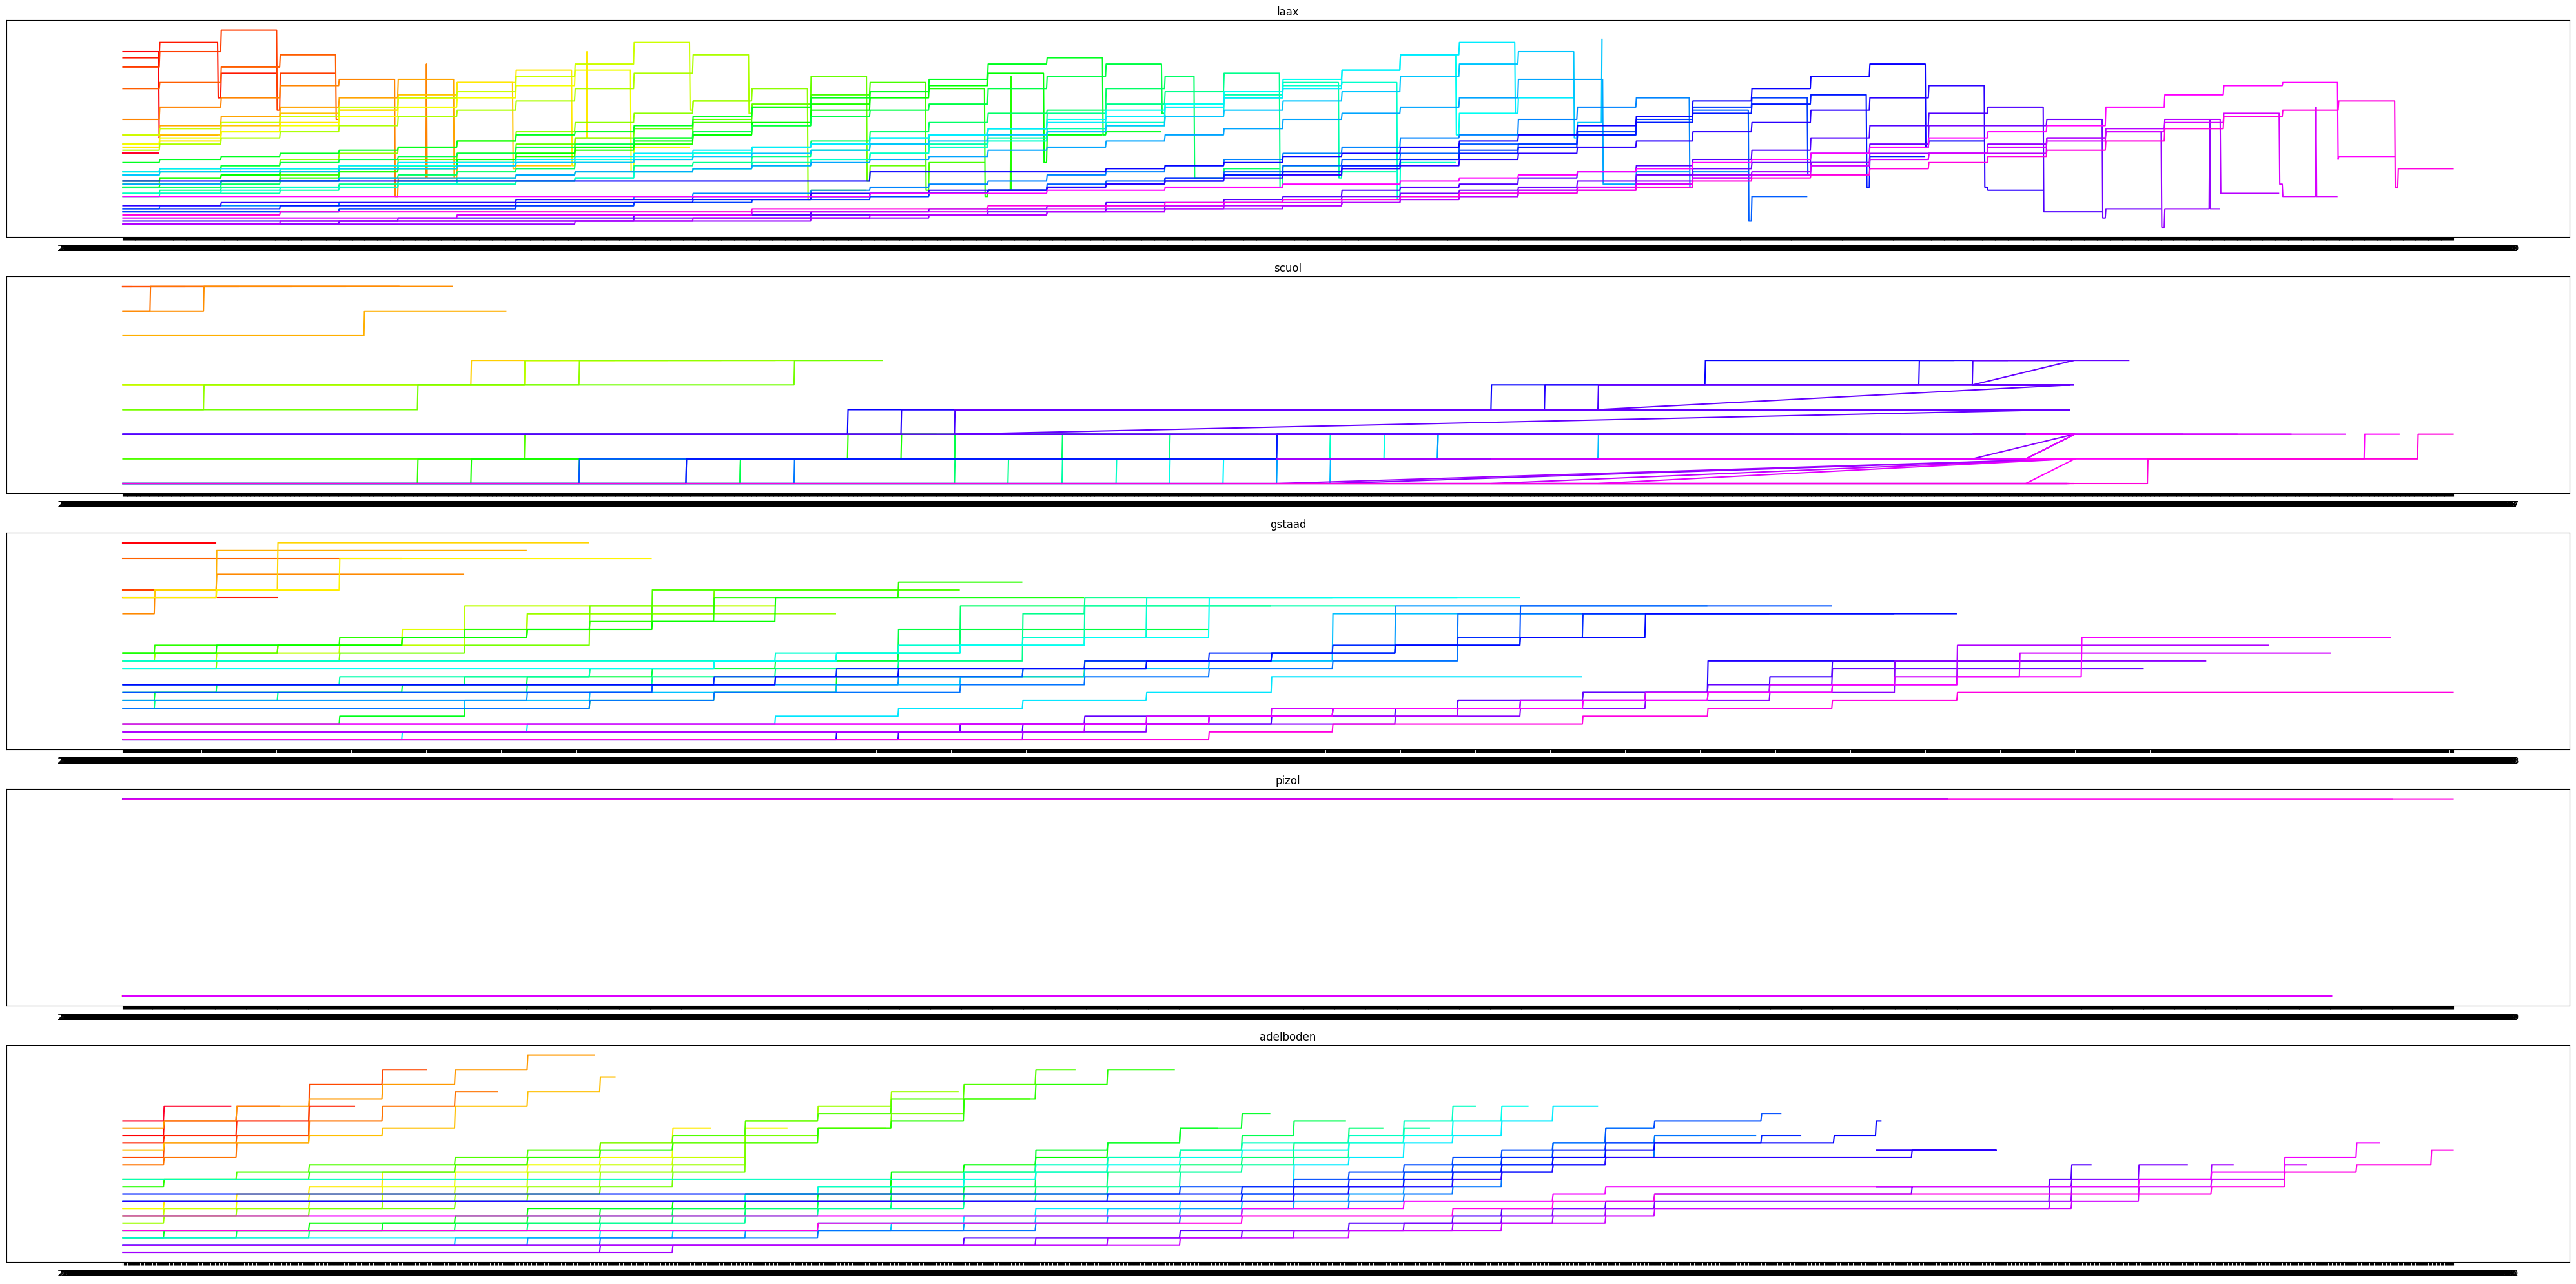

In [10]:
cm = pylab.get_cmap('gist_rainbow')

res_data = {}
for resort in aug_data:
    res_data[resort] = (
        aug_data[resort]
        .groupby(['date'])
        .apply(
            lambda x: x.resample('15min').ffill(),
            include_groups=False
        )
        .dropna()
        .groupby(["date"])
    )


fig = plt.figure(figsize=(40, 20))
for index, resort in enumerate(res_data):
    print(f"{resort}: resampled from {len(aug_data[resort])} to {sum(res_data[resort].size())}")
    axis = fig.add_subplot(
        5,1,index+1,
        yticks=[],
        title=resort
    )
    for index, (date, item) in enumerate(res_data[resort]):
        color = cm(1.0 * index / len(res_data[resort]))
        axis.plot(item['fetch_timestamp'], item["price"], color=color)
        

fig.tight_layout()
fig.show()

In [39]:
# price_files = glob.glob(
#     os.path.join('ds', "*_prices.csv")
# )

aug_files = glob.glob(
    os.path.join('ds', "*_augmented.csv")
)

ds = pd.DataFrame()
for aug_file in aug_files:
    resort = os.path.basename(aug_file).split("_")[0]
    df = pd.read_csv(aug_file)
    df["resort"] = resort
    #prices = pd.read_csv(os.path.join("ds", f"{resort}_prices.csv"))
    #df['price_history'] = df.apply(lambda row: row.day, axis = 1)

    ds = pd.concat([ds, df])

ds = ds[ds["max_price"] > 0]
ds.to_csv("ds/ds.csv", index=False)

In [12]:
import os
import platform
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-27-generic
Datetime: 2024-04-23 10:43:51
Python Version: 3.12.3
-----------------------------------
